In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("allData.pkl","rb") as f:
    data=pickle.load(f)

In [3]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
#View the data
data['CropParameters']

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823,14.4,7.1,NaN,3.6,1.8
1,43830,27.9,10.5,0.9,3.6,1.8
2,43838,32.8,12.8,2.8,3.6,1.8
3,43845,30.2,12.8,4.0,3.6,1.8
4,43852,30.3,12.5,5.2,4.5,1.8
...,...,...,...,...,...,...
133,43950,NaN,NaN,22.0,4.5,1.8
134,43957,NaN,NaN,NaN,4.5,1.8
135,43964,NaN,NaN,NaN,4.5,1.8
136,43971,NaN,NaN,NaN,4.5,1.8


In [5]:
#storing files under crop parameter to crp 
crp = data['CropParameters']

In [6]:
#Viewing the shape of data
crp.shape

(138, 6)

In [7]:
#Viewing data info
crp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        138 non-null    int64  
 1   Stem_elong   138 non-null    object 
 2   Stem_thick   108 non-null    float64
 3   Cum_trusses  108 non-null    float64
 4   stem_dens    137 non-null    float64
 5   plant_dens   138 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.6+ KB


In [8]:
#Describing the data
crp.describe()

,%Time,Stem_thick,Cum_trusses,stem_dens,plant_dens
count,138.000000,108.000000,108.000000,137.000000,138.000000
mean,43900.913043,10.837037,12.432407,4.591241,1.700000
std,46.740701,1.327818,6.699488,1.096802,0.257515
min,43823.000000,6.700000,0.900000,2.600000,1.300000
25%,43859.000000,10.275000,6.850000,3.900000,1.400000
50%,43901.000000,10.950000,12.400000,4.500000,1.800000
75%,43943.000000,11.700000,18.200000,5.200000,1.950000
max,43978.000000,13.600000,23.800000,8.000000,1.950000


In [9]:
#Checking for number of unique data entries in each column
crp.nunique()

%Time          23
Stem_elong     75
Stem_thick     44
Cum_trusses    86
stem_dens      10
plant_dens      4
dtype: int64

In [10]:
#Checking for unique data entries in each column
for col in crp.columns:
    print('{} : {}'.format(col,crp[col].unique()))

%Time : [43823 43830 43838 43845 43852 43859 43866 43873 43880 43887 43894 43901
 43908 43915 43922 43929 43936 43943 43950 43957 43964 43971 43978]
Stem_elong : [' 14.4' ' 27.9' ' 32.8' ' 30.2' ' 30.3' ' 33.6' ' 34.7' ' 39.3' ' 36.6'
 ' 34.4' ' 36' ' 32.5' ' 35.6' ' 29.4' ' 31.5' ' 31.9' ' 32.2' ' NaN'
 ' 14.2' ' 26.6' ' 35.9' ' 33.1' ' 38.8' ' 35.2' ' 39.0' ' 38.3' ' 36.3'
 ' 33.7' ' 31.3' ' 35.4' ' 35.1' ' 31.6' ' 33.5' ' 32.4' ' 8.5' ' 19.5'
 ' 27.2' ' 29.9' ' 28.8' ' 34.9' ' 36.8' ' 37.1' ' 33.8' ' 28.4' ' 34.3'
 ' 15' ' 20.5' ' 28.1' ' 33.3' ' 27.1' ' 28' ' 29.5' ' 29.2' ' 30.6'
 ' 32.3' ' 27.3' ' 14.5' ' 37.4' ' 34' ' 36.2' ' 37.2' ' 37.8' ' 35.8'
 ' 39.8' ' 35' ' 33.2' ' 30.7' ' 26.8' ' 18.7' ' 30.8' ' 29.1' ' 36.5'
 ' 33.9' ' 35.7' ' 14']
Stem_thick : [ 7.1 10.5 12.8 12.5 11.5 11.3 11.7 10.8 12.  10.9 11.1 10.3 10.4  9.9
  9.6  nan  7.2 11.8 11.4 11.  10.7 10.1  8.7  8.3  6.7  8.  10.2 11.9
 12.2 12.7 11.2 10.6  9.3 13.2 13.5 12.1  9.7  9.4  8.1 11.6 10.   9.8
  8.8 13.6 12.6]

In [11]:
#Checking the data type of each column
crp.dtypes

%Time            int64
Stem_elong      object
Stem_thick     float64
Cum_trusses    float64
stem_dens      float64
plant_dens     float64
dtype: object

In [12]:
#Displaying all the column headings
crp.columns

Index(['%Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
       'plant_dens'],
      dtype='object')

In [13]:
#Renaming
crp.rename(columns={"stem_dens ": "stem_dens", "%Time": "Time"}, inplace=True)

In [14]:
#changing time to its standard format 
crp['Time'] = pd.to_datetime(crp['Time'], unit='D', origin='1899-12-30')

In [15]:
#View the data
crp.head()

,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,2019-12-24,14.4,7.1,NaN,3.6,1.8
1,2019-12-31,27.9,10.5,0.9,3.6,1.8
2,2020-01-08,32.8,12.8,2.8,3.6,1.8
3,2020-01-15,30.2,12.8,4.0,3.6,1.8
4,2020-01-22,30.3,12.5,5.2,4.5,1.8


In [16]:
#Checking for Null values in the data
crp.isnull()

,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,False,False,False,True,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
133,False,False,True,False,False,False
134,False,False,True,True,False,False
135,False,False,True,True,False,False
136,False,False,True,True,False,False


In [17]:
#Checking for the sum of the null values in the data
crp.isnull().sum()

Time            0
Stem_elong      0
Stem_thick     30
Cum_trusses    30
stem_dens       1
plant_dens      0
dtype: int64

<AxesSubplot:>

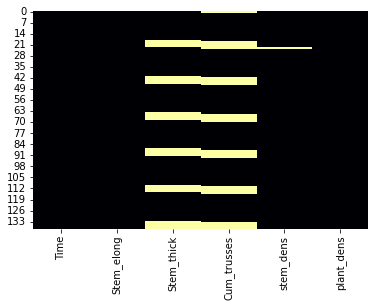

In [18]:
#Visualizing the null values
sns.heatmap(crp.isnull(),cbar=False,cmap='inferno')

In [19]:
#Replacing the null values with mean of their respective columns
num_col = ['Stem_thick', 'Cum_trusses',  'stem_dens']
for col in num_col:
    crp[col]=pd.to_numeric(crp[col])
    crp[col].fillna(crp[col].mean(), inplace=True)

<AxesSubplot:>

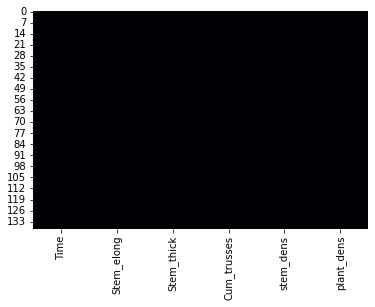

In [20]:
#Visualizing the null values again after replacing 
sns.heatmap(crp.isnull(),cbar=False,cmap='inferno')

# We can see that all the null values have disappeard from the data.

In [21]:
#Again checking for the null values sum in the data 
crp.isnull().sum()

Time           0
Stem_elong     0
Stem_thick     0
Cum_trusses    0
stem_dens      0
plant_dens     0
dtype: int64

In [22]:
#View the data
crp.head()

,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,2019-12-24,14.4,7.1,12.432407,3.6,1.8
1,2019-12-31,27.9,10.5,0.900000,3.6,1.8
2,2020-01-08,32.8,12.8,2.800000,3.6,1.8
3,2020-01-15,30.2,12.8,4.000000,3.6,1.8
4,2020-01-22,30.3,12.5,5.200000,4.5,1.8


In [23]:
#Getting all the column headings in a list
list(crp.columns.values)

['Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens', 'plant_dens']

In [24]:
#Storing all the listed column headings excluding 'Time' in  a variable 
list_crp_col=list(crp.columns.values)
list_crp_col.remove('Time')


In [25]:
#Converting all the int data types to float 
for i in list_crp_col:
    crp[i] = crp[i].astype(float)

In [26]:
#Printing data types of each column
crp.dtypes

Time           datetime64[ns]
Stem_elong            float64
Stem_thick            float64
Cum_trusses           float64
stem_dens             float64
plant_dens            float64
dtype: object

In [27]:
#Finding Correlation
correlation=crp.corr()
correlation

,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
Stem_elong,1.000000,0.593844,-0.057575,0.040192,0.151895
Stem_thick,0.593844,1.000000,-0.511376,-0.264880,0.086596
Cum_trusses,-0.057575,-0.511376,1.000000,0.499182,-0.009527
stem_dens,0.040192,-0.264880,0.499182,1.000000,0.004737
plant_dens,0.151895,0.086596,-0.009527,0.004737,1.000000


# **Plotting Heat map**

<AxesSubplot:>

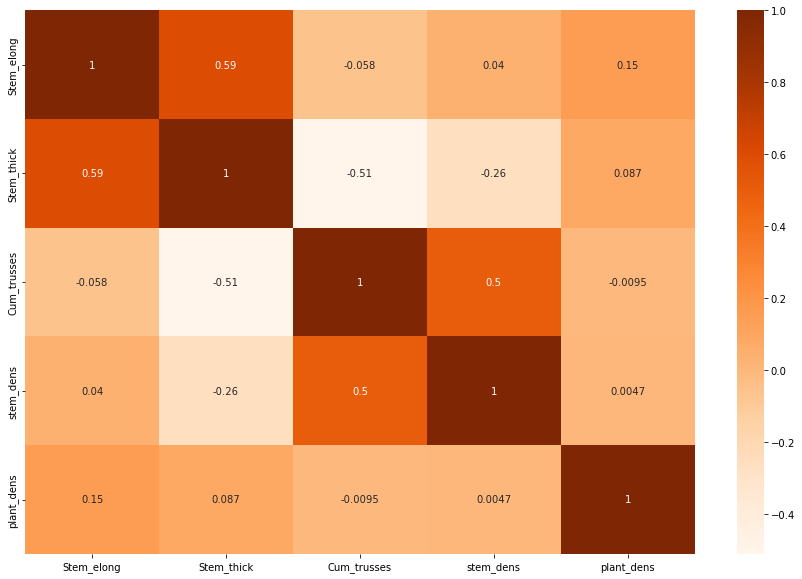

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(crp.corr(),cbar=True,annot=True,cmap='Oranges')


# From the Heat Map, we can see that 'Stem_elong' and  'Stem_thick' have strong positive correlation and, 'Stem_thick', 'Cum_trusses' have strong negative correlation.

# Plotting Pair plot to understand the relationship between column features.

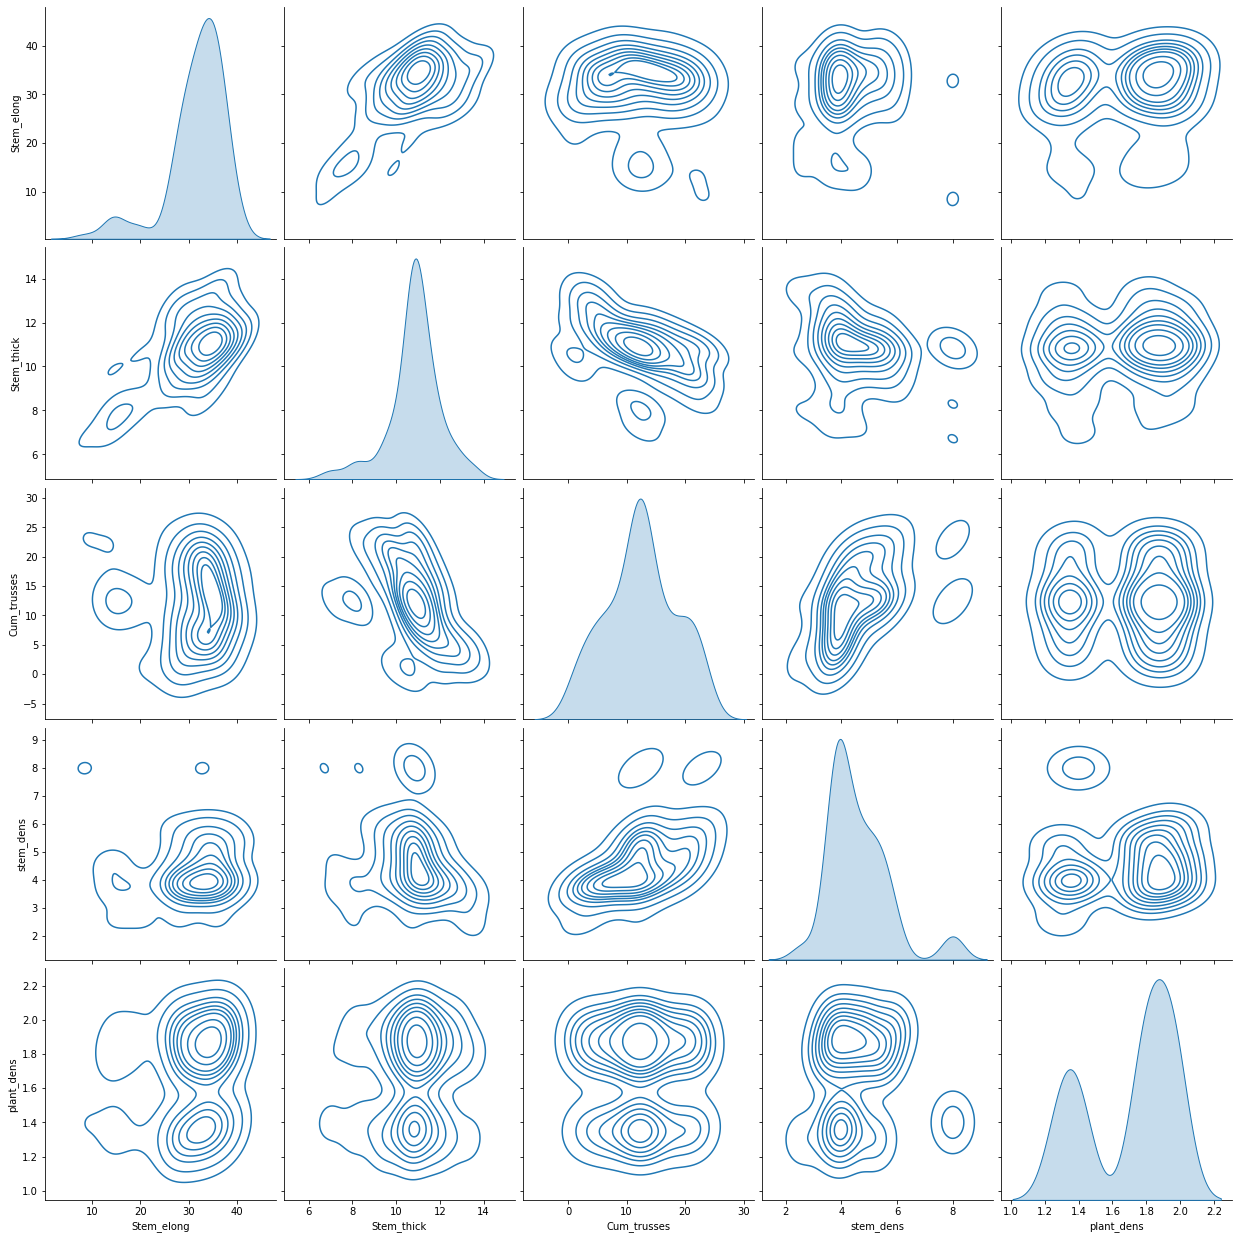

In [29]:
sns.pairplot(crp, height=3.5, kind="kde")

# Plotting Line Plot to analyze the data features with respect to time

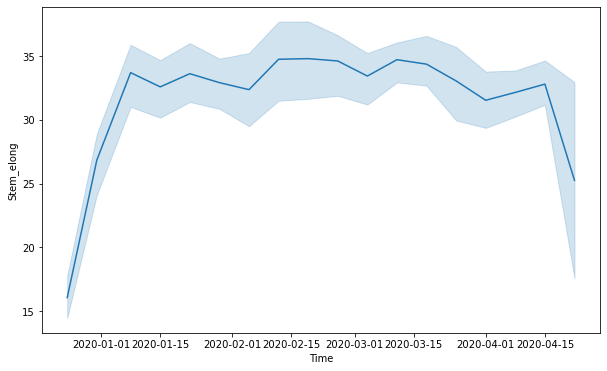

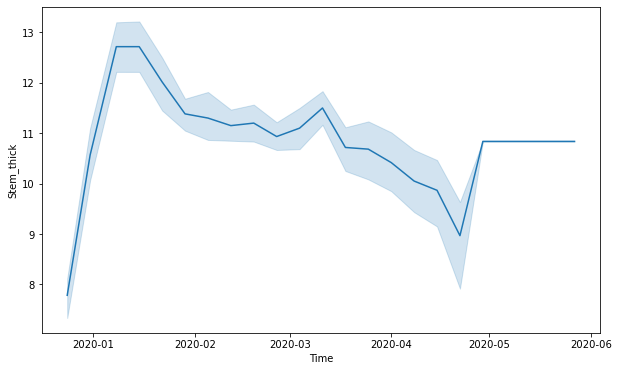

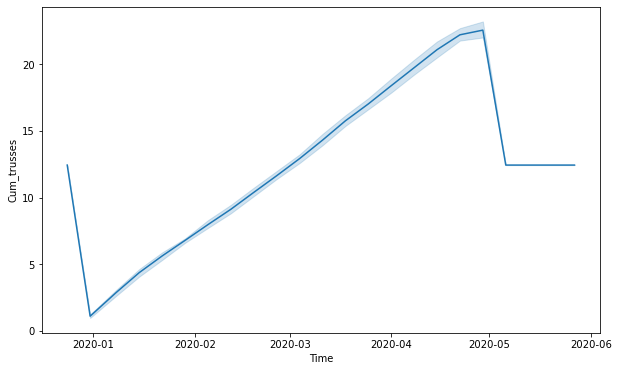

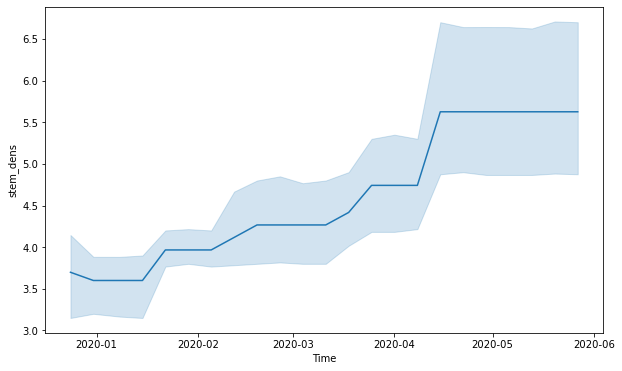

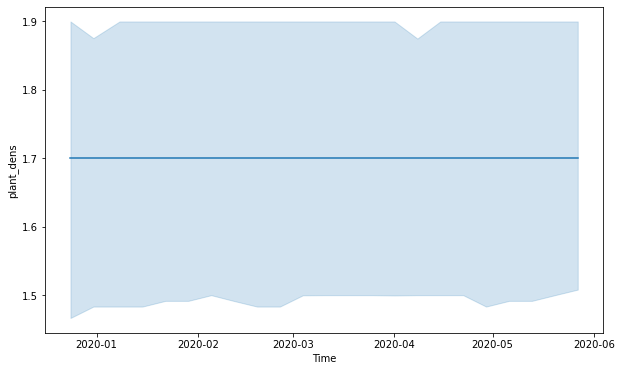

In [30]:
for col in ['Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens', 'plant_dens']:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=crp, x='Time', y=col)
    
  